### Snapshot pilot data processing script
Uses snapshot_dataproc_mod and the spreadsheet stored at **I:\DaniellePaynter\InVivoTTTPilots\snapshot_4OHT_pilot\data\processed\SS_data_collector.xlsx**
which contains: list of mice/slides/slices obtained through snapshot pilot experiment, raw cell counts by slice, basic histology info, and the 4OHT dosage the mouse received.

Green = gfp (both refer to eGFP fluorophore)

Red = tom (both refer to tdTomato fluorophore)

@author: dpaynter

First, add the location of **snapshotpilot_dataproc_mod** module to the path:

In [1]:
import sys
sys.path.insert(1, r'I:\Danielle Paynter\InVivoTTTPilots\snapshot_4OHT_pilot\src\data')

Then import everything else:

In [2]:
import snapshotpilot_dataproc_mod as ssp
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Set the location of 'SS_data_collector.xlsx' as datapath:

In [3]:
datapath = r'I:\Danielle Paynter\InVivoTTTPilots\snapshot_4OHT_pilot\data\processed\SS_data_collector.xlsx'

Create an object for each mouse:

In [4]:
DP_210202A = ssp.snapshot_mouse("DP_210202A", datapath)
DP_210202B = ssp.snapshot_mouse("DP_210202B", datapath)
DP_210202C = ssp.snapshot_mouse("DP_210202C", datapath)
DP_210202D = ssp.snapshot_mouse("DP_210202D", datapath)
DP_210203A = ssp.snapshot_mouse("DP_210203A", datapath)
DP_210203B = ssp.snapshot_mouse("DP_210203B", datapath)
DP_210308A = ssp.snapshot_mouse("DP_210308A", datapath)
DP_210308B = ssp.snapshot_mouse("DP_210308B", datapath)
DP_210308C = ssp.snapshot_mouse("DP_210308C", datapath)
DP_210416A = ssp.snapshot_mouse("DP_210416A", datapath)
DP_210416B = ssp.snapshot_mouse("DP_210416B", datapath)
DP_210417 = ssp.snapshot_mouse("DP_210417", datapath)

Create a concatenated dataframe for all mice:

In [5]:
all_mice_df = ssp.concat_dfs([DP_210202A.mouse_df, DP_210202B.mouse_df, DP_210202C.mouse_df,
                              DP_210202D.mouse_df, DP_210203A.mouse_df, DP_210203B.mouse_df,
                              DP_210308A.mouse_df, DP_210308B.mouse_df, DP_210308C.mouse_df,
                              DP_210416A.mouse_df, DP_210416B.mouse_df, DP_210417.mouse_df])

Get single-labeled cell proportions for each mouse:

In [6]:
DP_210202A_green_prop = DP_210202A.green_only_prop
DP_210202B_green_prop = DP_210202B.green_only_prop
DP_210202C_green_prop = DP_210202C.green_only_prop
DP_210202D_green_prop = DP_210202D.green_only_prop
DP_210203A_green_prop = DP_210203A.green_only_prop
DP_210203B_green_prop = DP_210203B.green_only_prop
DP_210308A_green_prop = DP_210308A.green_only_prop
DP_210308B_green_prop = DP_210308B.green_only_prop
DP_210308C_green_prop = DP_210308C.green_only_prop
DP_210416A_green_prop = DP_210416A.green_only_prop
DP_210416B_green_prop = DP_210416B.green_only_prop
DP_210417_green_prop = DP_210417.green_only_prop


DP_210202A_red_prop = DP_210202A.red_only_prop
DP_210202B_red_prop = DP_210202B.red_only_prop
DP_210202C_red_prop = DP_210202C.red_only_prop
DP_210202D_red_prop = DP_210202D.red_only_prop
DP_210203A_red_prop = DP_210203A.red_only_prop
DP_210203B_red_prop = DP_210203B.red_only_prop
DP_210308A_red_prop = DP_210308A.red_only_prop
DP_210308B_red_prop = DP_210308B.red_only_prop
DP_210308C_red_prop = DP_210308C.red_only_prop
DP_210416A_red_prop = DP_210416A.red_only_prop
DP_210416B_red_prop = DP_210416B.red_only_prop
DP_210417_red_prop = DP_210417.red_only_prop


#### Plot a bar graph with these proportions, sorted by mouse. Report the total number of cells counted in each mouse below the X-axis label:

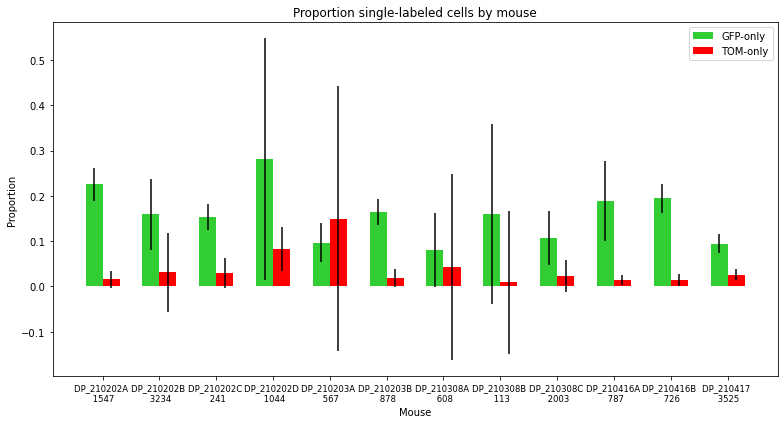

In [7]:
labels = ['DP_210202A \n {}'.format(int(DP_210202A.total_cells)), 'DP_210202B \n {}'.format(int(DP_210202B.total_cells)), 
          'DP_210202C \n {}'.format(int(DP_210202C.total_cells)), 'DP_210202D \n {}'.format(int(DP_210202D.total_cells)), 
          'DP_210203A \n {}'.format(int(DP_210203A.total_cells)), 'DP_210203B \n {}'.format(int(DP_210203B.total_cells)), 
          'DP_210308A \n {}'.format(int(DP_210308A.total_cells)), 'DP_210308B \n {}'.format(int(DP_210308B.total_cells)), 
          'DP_210308C \n {}'.format(int(DP_210308C.total_cells)), 'DP_210416A \n {}'.format(int(DP_210416A.total_cells)),
          'DP_210416B \n {}'.format(int(DP_210416B.total_cells)), 'DP_210417 \n {}'.format(int(DP_210417.total_cells))]
gfp_props = [DP_210202A_green_prop, DP_210202B_green_prop, DP_210202C_green_prop, 
             DP_210202D_green_prop, DP_210203A_green_prop, DP_210203B_green_prop,
             DP_210308A_green_prop, DP_210308B_green_prop, DP_210308C_green_prop,
             DP_210416A_green_prop, DP_210416B_green_prop, DP_210417_green_prop]
tom_props = [DP_210202A_red_prop, DP_210202B_red_prop, DP_210202C_red_prop, 
             DP_210202D_red_prop, DP_210203A_red_prop, DP_210203B_red_prop,
             DP_210308A_red_prop, DP_210308B_red_prop, DP_210308C_red_prop,
             DP_210416A_red_prop, DP_210416B_red_prop, DP_210417_red_prop]

gfp_err = [mouse.green_std for mouse in [DP_210202A, DP_210202B, DP_210202C, DP_210202D, DP_210203A, DP_210203B,
                                         DP_210308A, DP_210308B, DP_210308C, DP_210416A, DP_210416B, DP_210417]]
tom_err = [mouse.red_std for mouse in [DP_210202A, DP_210202B, DP_210202C, DP_210202D, DP_210203A, DP_210203B,
                                         DP_210308A, DP_210308B, DP_210308C, DP_210416A, DP_210416B, DP_210417]]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
fig.set_size_inches(11,6)
set1 =  ax.bar(x - width/2, gfp_props, width, yerr=gfp_err, label='GFP-only', color='limegreen')
set2 = ax.bar(x + width/2, tom_props, width, yerr=tom_err, label='TOM-only', color='red')

ax.set_ylabel('Proportion')
ax.set_xlabel('Mouse')
ax.set_title('Proportion single-labeled cells by mouse')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict ={'fontsize': 8.5})
ax.legend()

fig.tight_layout()

plt.show()

#### Plot the same graph, but without error bars:

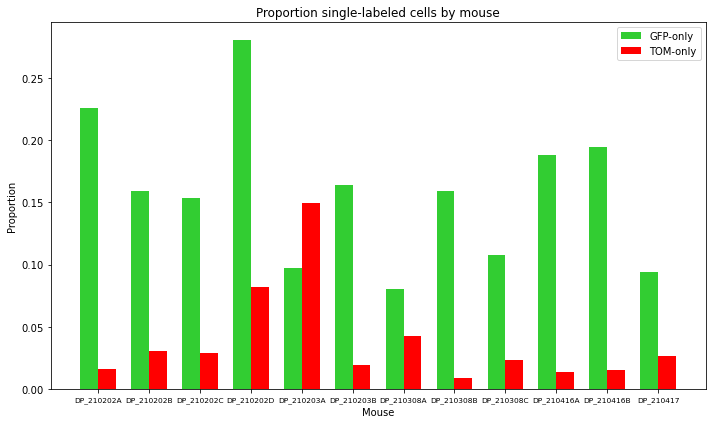

In [8]:
labels = ['DP_210202A', 'DP_210202B', 'DP_210202C', 'DP_210202D', 'DP_210203A', 'DP_210203B', 'DP_210308A',
          'DP_210308B', 'DP_210308C', 'DP_210416A', 'DP_210416B', 'DP_210417']
gfp_props = [DP_210202A_green_prop, DP_210202B_green_prop, DP_210202C_green_prop, 
             DP_210202D_green_prop, DP_210203A_green_prop, DP_210203B_green_prop,
             DP_210308A_green_prop, DP_210308B_green_prop, DP_210308C_green_prop,
             DP_210416A_green_prop, DP_210416B_green_prop, DP_210417_green_prop]
tom_props = [DP_210202A_red_prop, DP_210202B_red_prop, DP_210202C_red_prop, 
             DP_210202D_red_prop, DP_210203A_red_prop, DP_210203B_red_prop,
             DP_210308A_red_prop, DP_210308B_red_prop, DP_210308C_red_prop,
             DP_210416A_red_prop, DP_210416B_red_prop, DP_210417_red_prop]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
set1 =  ax.bar(x - width/2, gfp_props, width, label='GFP-only', color='limegreen')
set2 = ax.bar(x + width/2, tom_props, width, label='TOM-only', color='red')

ax.set_ylabel('Proportion')
ax.set_xlabel('Mouse')
ax.set_title('Proportion single-labeled cells by mouse')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict ={'fontsize': 7.5})
ax.legend()

fig.tight_layout()

plt.show()


#### Plot a bar graph with these proportions by condition or dosage; average across mice:

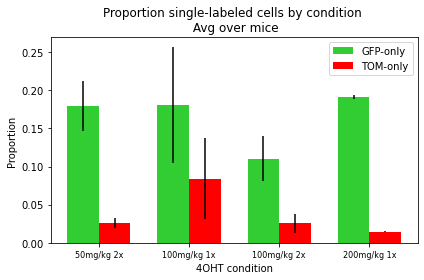

50x2 GFP-only avg + std: 0.1793537347426953, 0.03277407017710101
100x1 GFP-only avg + std: 0.1805540720939703, 0.07588189771412267
100x2 GFP-only avg + std: 0.11042280432012547, 0.029757920454111738
200x1 GFP-only avg + std: 0.1911353922731998, 0.0030794837598580177


In [9]:
labels = ['50mg/kg 2x', '100mg/kg 1x', '100mg/kg 2x', '200mg/kg 1x']
gfp_props = [np.average([DP_210202A_green_prop, DP_210202B_green_prop, DP_210202C_green_prop]), 
             np.average([DP_210202D_green_prop, DP_210203A_green_prop, DP_210203B_green_prop]),
             np.average([DP_210308A_green_prop, DP_210308B_green_prop, DP_210308C_green_prop, 
                         DP_210417_green_prop]),
             np.average([DP_210416A_green_prop, DP_210416B_green_prop])]


tom_props = [np.average([DP_210202A_red_prop, DP_210202B_red_prop, DP_210202C_red_prop]), 
             np.average([DP_210202D_red_prop, DP_210203A_red_prop, DP_210203B_red_prop]),
             np.average([DP_210308A_red_prop, DP_210308B_red_prop, DP_210308C_red_prop,
                         DP_210417_red_prop]),
             np.average([DP_210416A_red_prop, DP_210416B_red_prop])]

x = np.arange(len(labels))
width = 0.35

gfp_err = [np.std([DP_210202A_green_prop, DP_210202B_green_prop, DP_210202C_green_prop]), 
           np.std([DP_210202D_green_prop, DP_210203A_green_prop, DP_210203B_green_prop]),
           np.std([DP_210308A_green_prop, DP_210308B_green_prop, DP_210308C_green_prop,
                    DP_210417_green_prop]),
           np.std([DP_210416A_green_prop, DP_210416B_green_prop])]

tom_err = [np.std([DP_210202A_red_prop, DP_210202B_red_prop, DP_210202C_red_prop]), 
           np.std([DP_210202D_red_prop, DP_210203A_red_prop, DP_210203B_red_prop]),
           np.std([DP_210308A_red_prop, DP_210308B_red_prop, DP_210308C_red_prop,
                    DP_210417_red_prop]),
           np.std([DP_210416A_red_prop, DP_210416B_red_prop])]

fig, ax = plt.subplots()
set1 =  ax.bar(x - width/2, gfp_props, width, yerr=gfp_err, label='GFP-only', color='limegreen')
set2 = ax.bar(x + width/2, tom_props, width, yerr=tom_err, label='TOM-only', color='red')

ax.set_ylabel('Proportion')
ax.set_xlabel('4OHT condition')
ax.set_title('Proportion single-labeled cells by condition \n Avg over mice')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict ={'fontsize':8})
ax.legend()

fig.tight_layout()

plt.show()
print ('50x2 GFP-only avg + std: {} {}'.format(str(gfp_props[0]) + ',', gfp_err[0]))
print ('100x1 GFP-only avg + std: {} {}'.format(str(gfp_props[1]) + ',', gfp_err[1]))
print ('100x2 GFP-only avg + std: {} {}'.format(str(gfp_props[2]) + ',', gfp_err[2]))
print ('200x1 GFP-only avg + std: {} {}'.format(str(gfp_props[3]) + ',', gfp_err[3]))

#### Plot a bar graph with these proportions by condition or dosage; use the whole cell population from the group:

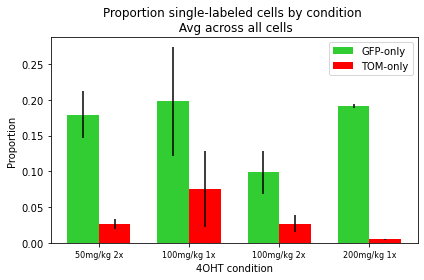

50x2 GFP-only avg + std: 0.17921146953405018, 0.03277407017710101
100x1 GFP-only avg + std: 0.1976697468862997, 0.07588189771412267
100x2 GFP-only avg + std: 0.09841574651944311, 0.029757920454111738
200x1 GFP-only avg + std: 0.19101123595505617, 0.0030794837598580177


In [10]:
gfp_50x2 = np.sum([DP_210202A.green_cells, DP_210202B.green_cells, DP_210202C.green_cells]) / np.sum([DP_210202A.total_cells, DP_210202B.total_cells, DP_210202C.total_cells])
gfp_100x1 = np.sum([DP_210202D.green_cells, DP_210203A.green_cells, DP_210203B.green_cells]) /np.sum([DP_210202D.total_cells, DP_210203A.total_cells, DP_210203B.total_cells])
gfp_100x2 = np.sum([DP_210308A.green_cells, DP_210308B.green_cells, DP_210308C.green_cells, DP_210417.green_cells]) / np.sum([DP_210308A.total_cells, DP_210308B.total_cells, DP_210308C.total_cells, DP_210417.total_cells])
gfp_200x1 = np.sum([DP_210416A.green_cells, DP_210416B.green_cells]) /  np.sum([DP_210416A.total_cells, DP_210416B.total_cells])

tom_50x2 = np.sum([DP_210202A.red_cells, DP_210202B.red_cells, DP_210202C.red_cells]) / np.sum([DP_210202A.total_cells, DP_210202B.total_cells, DP_210202C.total_cells])
tom_100x1 = np.sum([DP_210202D.red_cells, DP_210203A.red_cells, DP_210203B.red_cells]) /np.sum([DP_210202D.total_cells, DP_210203A.total_cells, DP_210203B.total_cells])
tom_100x2 = np.sum([DP_210308A.red_cells, DP_210308B.red_cells, DP_210308C.red_cells, DP_210417.red_cells]) / np.sum([DP_210308A.total_cells, DP_210308B.total_cells, DP_210308C.total_cells, DP_210417.total_cells])
tom_200x1 = np.sum([DP_210416A.red_cells, DP_210416B.red_cells]) /  np.sum([DP_210416A.total_cells, DP_210417.total_cells])

labels = ['50mg/kg 2x', '100mg/kg 1x', '100mg/kg 2x', '200mg/kg 1x']
gfp_props = [gfp_50x2, gfp_100x1, gfp_100x2, gfp_200x1] 

tom_props = [tom_50x2, tom_100x1, tom_100x2, tom_200x1]

x = np.arange(len(labels))
width = 0.35

gfp_err = [np.std([DP_210202A_green_prop, DP_210202B_green_prop, DP_210202C_green_prop]), 
           np.std([DP_210202D_green_prop, DP_210203A_green_prop, DP_210203B_green_prop]),
           np.std([DP_210308A_green_prop, DP_210308B_green_prop, DP_210308C_green_prop, DP_210417_green_prop]),
           np.std([DP_210416A_green_prop, DP_210416B_green_prop])]

tom_err = [np.std([DP_210202A_red_prop, DP_210202B_red_prop, DP_210202C_red_prop]), 
           np.std([DP_210202D_red_prop, DP_210203A_red_prop, DP_210203B_red_prop]),
           np.std([DP_210308A_red_prop, DP_210308B_red_prop, DP_210308C_red_prop, DP_210417_red_prop]),
           np.std([DP_210416A_red_prop, DP_210416B_red_prop])]

fig, ax = plt.subplots()
set1 =  ax.bar(x - width/2, gfp_props, width, yerr=gfp_err, label='GFP-only', color='limegreen')
set2 = ax.bar(x + width/2, tom_props, width, yerr=tom_err, label='TOM-only', color='red')

ax.set_ylabel('Proportion')
ax.set_xlabel('4OHT condition')
ax.set_title('Proportion single-labeled cells by condition \n Avg across all cells')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict ={'fontsize':8})
ax.legend()

fig.tight_layout()

plt.show()    
print ('50x2 GFP-only avg + std: {} {}'.format(str(gfp_props[0]) + ',', gfp_err[0]))
print ('100x1 GFP-only avg + std: {} {}'.format(str(gfp_props[1]) + ',', gfp_err[1]))
print ('100x2 GFP-only avg + std: {} {}'.format(str(gfp_props[2]) + ',', gfp_err[2]))
print ('200x1 GFP-only avg + std: {} {}'.format(str(gfp_props[3]) + ',', gfp_err[3]))

#### Plot correlation between total number of cells in a slice, and proportion single-labeled cells:

Text(0.5, 0, 'Total labeled cell count')

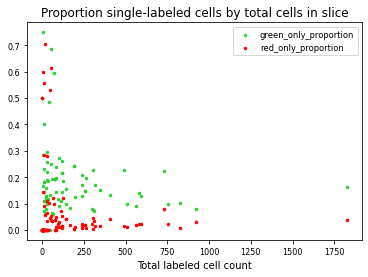

In [11]:
sub_df = all_mice_df[['total_cell_count','green_only_proportion','red_only_proportion']]
filtered_df = sub_df[sub_df['green_only_proportion'].notna()]

total_cells = list(filtered_df['total_cell_count'])
green_prop = list(filtered_df['green_only_proportion'])
red_prop = list(filtered_df['red_only_proportion'])
fig, ax = plt.subplots()
for fluo, color in zip(['green_only_proportion', 'red_only_proportion'], ['limegreen','red']):
   x, y = total_cells, filtered_df[fluo]
   ax.scatter(x ,y, label=fluo, c=color, s=6)
ax.legend(loc='upper right', fontsize='small')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(8)
ax.set_title('Proportion single-labeled cells by total cells in slice')
ax.set_xlabel('Total labeled cell count')

#### Plot a bar graph; group by number of injections:

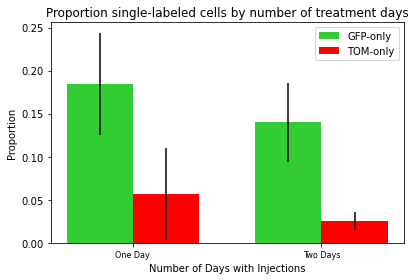

One-inj GFP-only avg + std: 0.18478660016566212, 0.059038141648643766
Two-inj GFP-only avg + std: 0.13996463164408396, 0.046151825412323336


In [12]:
labels = ['One Day', 'Two Days']
gfp_props = [np.average([DP_210202D_green_prop, DP_210203A_green_prop, DP_210203B_green_prop, DP_210416A_green_prop, DP_210416B_green_prop]),
             np.average([DP_210202A_green_prop, DP_210202B_green_prop, DP_210202C_green_prop, DP_210308A_green_prop, DP_210308B_green_prop, DP_210308C_green_prop, 
                         DP_210417_green_prop])]
       

tom_props = [np.average([DP_210202D_red_prop, DP_210203A_red_prop, DP_210203B_red_prop, DP_210416A_red_prop, DP_210416B_red_prop]),
             np.average([DP_210202A_red_prop, DP_210202B_red_prop, DP_210202C_red_prop, DP_210308A_red_prop, DP_210308B_red_prop, DP_210308C_red_prop, 
                         DP_210417_red_prop])]
x = np.arange(len(labels))
width = 0.35

gfp_err = [np.std([DP_210202D_green_prop, DP_210203A_green_prop, DP_210203B_green_prop, DP_210416A_green_prop, DP_210416B_green_prop]),
             np.std([DP_210202A_green_prop, DP_210202B_green_prop, DP_210202C_green_prop, DP_210308A_green_prop, DP_210308B_green_prop, DP_210308C_green_prop, 
                         DP_210417_green_prop])]

tom_err = [np.std([DP_210202D_red_prop, DP_210203A_red_prop, DP_210203B_red_prop, DP_210416A_red_prop, DP_210416B_red_prop]),
             np.std([DP_210202A_red_prop, DP_210202B_red_prop, DP_210202C_red_prop, DP_210308A_red_prop, DP_210308B_red_prop, DP_210308C_red_prop, 
                         DP_210417_red_prop])]

fig, ax = plt.subplots()
set1 =  ax.bar(x - width/2, gfp_props, width, yerr=gfp_err, label='GFP-only', color='limegreen')
set2 = ax.bar(x + width/2, tom_props, width, yerr=tom_err, label='TOM-only', color='red')

ax.set_ylabel('Proportion')
ax.set_xlabel('Number of Days with Injections')
ax.set_title('Proportion single-labeled cells by number of treatment days')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict ={'fontsize':8})
ax.legend()

fig.tight_layout()

plt.show()

print ('One-inj GFP-only avg + std: {} {}'.format(str(gfp_props[0]) + ',', gfp_err[0]))
print ('Two-inj GFP-only avg + std: {} {}'.format(str(gfp_props[1]) + ',', gfp_err[1]))

#### Plot a bar graph; group by total dose (disregard number of injections):

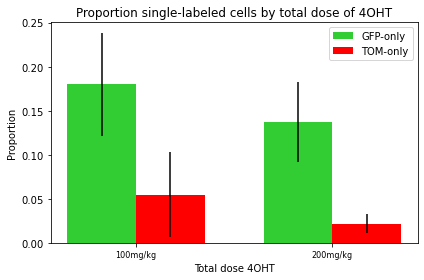

100mg/kg GFP-only avg + std: 0.17995390341833284, 0.058450502485216285
200mg/kg GFP-only avg + std: 0.13732700030448358, 0.0451795139752603


In [13]:
labels = ['100mg/kg', '200mg/kg']

gfp_props = [np.average([DP_210202A_green_prop, DP_210202B_green_prop, DP_210202C_green_prop, 
                         DP_210202D_green_prop, DP_210203A_green_prop, DP_210203B_green_prop]),
             np.average([DP_210308A_green_prop, DP_210308B_green_prop, DP_210308C_green_prop, 
                         DP_210417_green_prop, DP_210416A_green_prop, DP_210416B_green_prop])]


tom_props = [np.average([DP_210202A_red_prop, DP_210202B_red_prop, DP_210202C_red_prop, 
                         DP_210202D_red_prop, DP_210203A_red_prop, DP_210203B_red_prop]),
             np.average([DP_210308A_red_prop, DP_210308B_red_prop, DP_210308C_red_prop,
                         DP_210417_red_prop, DP_210416A_red_prop, DP_210416B_red_prop])]

x = np.arange(len(labels))

width = 0.35

gfp_err = [np.std([DP_210202A_green_prop, DP_210202B_green_prop, DP_210202C_green_prop, 
                         DP_210202D_green_prop, DP_210203A_green_prop, DP_210203B_green_prop]),
           np.std([DP_210308A_green_prop, DP_210308B_green_prop, DP_210308C_green_prop, 
                         DP_210417_green_prop, DP_210416A_green_prop, DP_210416B_green_prop])]

tom_err = [np.std([DP_210202A_red_prop, DP_210202B_red_prop, DP_210202C_red_prop, 
                         DP_210202D_red_prop, DP_210203A_red_prop, DP_210203B_red_prop]),
           np.std([DP_210308A_red_prop, DP_210308B_red_prop, DP_210308C_red_prop,
                         DP_210417_red_prop, DP_210416A_red_prop, DP_210416B_red_prop])]

fig, ax = plt.subplots()
set1 =  ax.bar(x - width/2, gfp_props, width, yerr=gfp_err, label='GFP-only', color='limegreen')
set2 = ax.bar(x + width/2, tom_props, width, yerr=tom_err, label='TOM-only', color='red')

ax.set_ylabel('Proportion')
ax.set_xlabel('Total dose 4OHT')
ax.set_title('Proportion single-labeled cells by total dose of 4OHT')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict ={'fontsize':8})
ax.legend()

fig.tight_layout()

plt.show()

print ('100mg/kg GFP-only avg + std: {} {}'.format(str(gfp_props[0]) + ',', gfp_err[0]))
print ('200mg/kg GFP-only avg + std: {} {}'.format(str(gfp_props[1]) + ',', gfp_err[1]))

#### Plot a bar graph to show overall average across all mice:

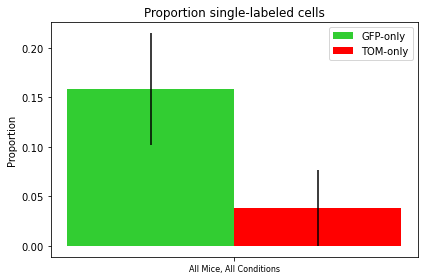

GFP-only avg + std: 0.1586404518614082, 0.0564188627958494


In [14]:
labels = ['All Mice, All Conditions']
gfp_props = [np.average([DP_210202A_green_prop, DP_210202B_green_prop, DP_210202C_green_prop, 
                         DP_210202D_green_prop, DP_210203A_green_prop, DP_210203B_green_prop, 
                         DP_210308A_green_prop, DP_210308B_green_prop, DP_210308C_green_prop, 
                         DP_210417_green_prop, DP_210416A_green_prop, DP_210416B_green_prop])]


tom_props = [np.average([DP_210202A_red_prop, DP_210202B_red_prop, DP_210202C_red_prop, 
                         DP_210202D_red_prop, DP_210203A_red_prop, DP_210203B_red_prop, 
                         DP_210308A_red_prop, DP_210308B_red_prop, DP_210308C_red_prop,
                         DP_210417_red_prop, DP_210416A_red_prop, DP_210416B_red_prop])]

x = np.arange(len(labels))

width = 0.35
gfp_err = [np.std([DP_210202A_green_prop, DP_210202B_green_prop, DP_210202C_green_prop, 
                         DP_210202D_green_prop, DP_210203A_green_prop, DP_210203B_green_prop, 
                         DP_210308A_green_prop, DP_210308B_green_prop, DP_210308C_green_prop, 
                         DP_210417_green_prop, DP_210416A_green_prop, DP_210416B_green_prop])]

tom_err = [np.std([DP_210202A_red_prop, DP_210202B_red_prop, DP_210202C_red_prop, 
                         DP_210202D_red_prop, DP_210203A_red_prop, DP_210203B_red_prop, 
                         DP_210308A_red_prop, DP_210308B_red_prop, DP_210308C_red_prop,
                         DP_210417_red_prop, DP_210416A_red_prop, DP_210416B_red_prop])]

fig, ax = plt.subplots()
set1 =  ax.bar(x - width/2, gfp_props, width, yerr=gfp_err,  label='GFP-only', color='limegreen')
set2 = ax.bar(x + width/2, tom_props, width, yerr=tom_err, label='TOM-only', color='red')

ax.set_ylabel('Proportion')
ax.set_title('Proportion single-labeled cells')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict ={'fontsize':8})
ax.legend()

fig.tight_layout()

plt.show()

print ('GFP-only avg + std: {} {}'.format(str(gfp_props[0]) + ',', gfp_err[0]))